In [1]:
from importlib.resources import files

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import groupby

In [50]:
dt_execute_rbg = pd.read_pickle("result/Execute RBG.pkl.gz")
dt_start_handle_request = pd.read_pickle("result/Start Handle Request.pkl.gz")
dt_end_handle_request = pd.read_pickle("result/End Handle Request.pkl.gz")
dt_path_movement_finished = pd.read_pickle("result/Path Movement Finished.pkl.gz")
dt_path_movement_finished_detail = pd.read_pickle("result/Path Movement Finished - Detail.pkl.gz")
dt_path_movement_failed = pd.read_pickle("result/Path Movement Failed.pkl.gz")
dt_unknown = pd.read_pickle("result/Unknown Content.pkl.gz")
dt_alerts_handled = pd.read_pickle("result/Alerts Handled.pkl.gz")
dt_alerts_processing = pd.read_pickle("result/Alerts Processing.pkl.gz")
dt_alerts_received = pd.read_pickle("result/Alerts Received.pkl.gz")
dt_telegrams_processed = pd.read_pickle("result/Telegrams Processed.pkl.gz")
dt_telegrams_sent = pd.read_pickle("result/Telegrams Sent.pkl.gz")
dt_is_position_ok = pd.read_pickle("result/Check Position.pkl.gz")
dt_check_sequence = pd.read_pickle("result/Check Sequence.pkl.gz")
dt_is_vb_ok = pd.read_pickle("result/IsVBOK.pkl.gz")
dt_akl_layout = pd.read_csv("AKL_complete.csv")
dt_get_set_nio = pd.read_pickle("result/Get Set NIO.pkl.gz")

In [51]:
# dt_unknown[dt_unknown['data'].astype(str).str.contains('1847236')]
# dt_unknown[dt_unknown['stage'] == 'getAndSetNioDestination']
dt_get_set_nio

,timestamp,info_code,thread,operation_num,id,send_to,status
0,2025.02.06 05:58:52.135,I,MF1,G41854690,1847014,1746,(AUSSCHLEUSEN)
1,2025.02.06 06:21:05.702,I,MF1,G41915706,1847177,1746,(AUSSCHLEUSEN)
2,2025.02.06 06:24:32.048,I,MF1,G41923945,1847179,1746,(AUSSCHLEUSEN)
3,2025.02.06 06:28:07.249,I,MF1,G41934198,1847180,1746,(AUSSCHLEUSEN)
4,2025.02.06 06:30:07.182,I,MF1,G41939098,1847181,1746,(AUSSCHLEUSEN)
...,...,...,...,...,...,...,...
110,2025.02.07 18:08:37.973,I,MF1,G48964071,1849970,1746,(AUSSCHLEUSEN)
111,2025.02.07 19:12:44.045,I,MF1,G49133301,1849993,1746,(AUSSCHLEUSEN)
112,2025.02.07 19:23:26.351,I,MF1,G49166150,1850035,1746,(AUSSCHLEUSEN)
113,2025.02.07 19:35:56.185,I,MF1,G49199447,1850038,1746,(AUSSCHLEUSEN)


In [3]:
# Change Format to Timestamp
dt_start_handle_request['timestamp'] = pd.to_datetime(
    dt_start_handle_request['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_end_handle_request['timestamp'] = pd.to_datetime(
    dt_end_handle_request['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_execute_rbg['timestamp'] = pd.to_datetime(
    dt_execute_rbg['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_path_movement_finished['timestamp'] = pd.to_datetime(
    dt_path_movement_finished['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_path_movement_finished_detail['timestamp'] = pd.to_datetime(
    dt_path_movement_finished_detail['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_path_movement_failed['timestamp'] = pd.to_datetime(
    dt_path_movement_failed['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_is_position_ok['timestamp'] = pd.to_datetime(
    dt_is_position_ok['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_check_sequence['timestamp'] = pd.to_datetime(
    dt_check_sequence['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_is_vb_ok['timestamp'] = pd.to_datetime(
    dt_is_vb_ok['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_alerts_handled['timestamp'] = pd.to_datetime(
    dt_alerts_handled['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_alerts_processing['timestamp'] = pd.to_datetime(
    dt_alerts_processing['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_alerts_received['timestamp'] = pd.to_datetime(
    dt_alerts_received['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_telegrams_processed['timestamp'] = pd.to_datetime(
    dt_telegrams_processed['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

dt_telegrams_sent['timestamp'] = pd.to_datetime(
    dt_telegrams_sent['timestamp'], format="%Y.%m.%d %H:%M:%S.%f"
)

In [ ]:
# Regarding INFO CODE
# dt_path_movement_failed['info_code'] -> only W
# dt_check_sequence['info_code'] -> only W
# dt_is_position_ok['info_code'] -> W and I
# dt_unknown -> I, W, E
# the rest only I

In [4]:
# Separate the LamTask into multiple row with single le each row

# Step 1: Ensure 'le' is a string
dt_execute_rbg['le'] = dt_execute_rbg['le'].astype(str)

# Step 2: Split and explode
dt_execute_rbg_split = dt_execute_rbg.assign(
    le=dt_execute_rbg['le'].str.split(r',\s*')  # split on comma and optional space
).explode('le')

# Step 3: Optional - strip whitespace
dt_execute_rbg_split['le'] = dt_execute_rbg_split['le'].str.strip()

In [6]:
# Change the format of Paths from list of dict into arrow

def format_paths(path_list):
    if isinstance(path_list, list):
        return ', '.join(f"{p['from']} -> {p['to']}" for p in path_list if 'from' in p and 'to' in p)
    return ''

# run the formatting only once, if needed to refresh the dataframe then re-do from the top
# dt_path_movement_finished['paths'] = dt_path_movement_finished['paths'].apply(format_paths)


In [7]:
# combine several table to know the movement of each le

start_df = dt_start_handle_request[['timestamp', 'le', 'force_check']].copy()
start_df.rename(columns={'force_check': 'additional_data'}, inplace=True)
start_df['additional_data'] = 'force_check: ' + start_df['additional_data'].astype(str)
start_df['event'] = 'start_handle_request'

end_df = dt_end_handle_request[['timestamp', 'le', 'result']].copy()
end_df.rename(columns={'result': 'additional_data'}, inplace=True)
end_df['additional_data'] = 'result: ' + end_df['additional_data'].astype(str)
end_df['event'] = 'end_handle_request'

# use the split instead of the original so there is no multiple value in le column
execute_rbg_df = dt_execute_rbg_split[['timestamp', 'le', 'fail_status']].copy()
execute_rbg_df.rename(columns={'fail_status': 'additional_data'}, inplace=True)
execute_rbg_df['additional_data'] = 'fail_status: ' + execute_rbg_df['additional_data'].astype(str)
execute_rbg_df['event'] = 'execute_rbg'

path_movement_df = dt_path_movement_finished[['timestamp', 'mfs_id', 'paths']].copy()
path_movement_df.rename(columns={'mfs_id': 'le'}, inplace=True)
path_movement_df.rename(columns={'paths': 'additional_data'}, inplace=True)
path_movement_df['additional_data'] = 'paths: ' + path_movement_df['additional_data'].astype(str)
path_movement_df['event'] = 'path_movement_finished'

position_df = dt_is_position_ok[['timestamp', 'id', 'status']].copy()
position_df.rename(columns={'id': 'le'}, inplace=True)
position_df.rename(columns={'status': 'additional_data'}, inplace=True)
position_df['additional_data'] = 'status: ' + position_df['additional_data'].astype(str)
position_df['event'] = 'is_position_ok'

check_sequence_df = dt_check_sequence[['timestamp', 'id', 'returned']].copy()
check_sequence_df.rename(columns={'id': 'le'}, inplace=True)
check_sequence_df.rename(columns={'returned': 'additional_data'}, inplace=True)
check_sequence_df['additional_data'] = 'returned: ' + check_sequence_df['additional_data'].astype(str)
check_sequence_df['event'] = 'check_sequence'

is_vb_ok_df = dt_is_vb_ok[['timestamp', 'id', 'data']].copy()
is_vb_ok_df.rename(columns={'id': 'le'}, inplace=True)
is_vb_ok_df.rename(columns={'data': 'additional_data'}, inplace=True)
is_vb_ok_df['additional_data'] = 'data: ' + is_vb_ok_df['additional_data'].astype(str)
is_vb_ok_df['event'] = 'is_vb_ok'

combined_le_df = pd.concat([start_df, end_df, execute_rbg_df, path_movement_df, position_df, check_sequence_df, is_vb_ok_df], ignore_index=True)
combined_le_df = combined_le_df.sort_values(by=['le', 'timestamp'])

# Helper to remove consecutive duplicates
def remove_consecutive_duplicates(event_list):
    return [key for key, _ in groupby(event_list)]

# Apply it after sorting and grouping
event_sequence = (
    combined_le_df
    .sort_values(['le', 'timestamp'])
    .groupby('le')['event']
    .apply(lambda x: remove_consecutive_duplicates(list(x)))
    .reset_index(name='event_sequence')
)
# 3387 unique event_sequence

event_counts = (
    combined_le_df
    .groupby(['le', 'event'])
    .size()
    .unstack(fill_value=0)  # Optional: to make it wide-form table
    .reset_index()
)


le_event_summary = (
    combined_le_df
    .groupby('le')['timestamp']
    .agg(
        event_count='count',
        first_timestamp='min',
        last_timestamp='max'
    )
    .reset_index()
)

# Optional: Add duration in seconds
le_event_summary['duration_sec'] = (le_event_summary['last_timestamp'] - le_event_summary['first_timestamp']).dt.total_seconds()
# 11278 unique le

In [12]:
event_counts

event,le,check_sequence,end_handle_request,execute_rbg,is_position_ok,is_vb_ok,path_movement_finished,start_handle_request
0,1846998,1,39,198,3,36,55,39
1,1846999,1,35,141,3,32,51,35
2,1847000,1,39,193,3,36,57,39
3,1847001,1,38,175,3,35,56,38
4,1847002,1,3,24,3,0,10,3
...,...,...,...,...,...,...,...,...
11273,1858274,26,121,218,31,90,123,121
11274,1858275,1,36,121,3,33,54,36
11275,1858276,59,73,43,61,12,22,73
11276,1858277,1,34,96,3,31,52,34


In [29]:
le_event_summary

,le,event_count,first_timestamp,last_timestamp,duration_sec
0,1846998,371,2025-02-06 05:58:06.365,2025-02-06 06:08:23.205,616.840
1,1846999,298,2025-02-06 05:58:06.365,2025-02-06 06:04:36.107,389.742
2,1847000,368,2025-02-06 05:58:06.365,2025-02-06 06:07:04.490,538.125
3,1847001,346,2025-02-06 05:58:06.365,2025-02-06 06:06:20.247,493.882
4,1847002,44,2025-02-06 05:58:06.240,2025-02-06 06:00:18.336,132.096
...,...,...,...,...,...
11273,1858274,730,2025-02-13 19:08:07.291,2025-02-13 19:13:10.812,303.521
11274,1858275,284,2025-02-13 19:08:18.011,2025-02-13 19:14:23.735,365.724
11275,1858276,343,2025-02-13 19:08:18.011,2025-02-13 19:11:49.677,211.666
11276,1858277,251,2025-02-13 19:08:18.011,2025-02-13 19:14:02.106,344.095


In [8]:
# combine all alert and telegram

alerts_received_df = dt_alerts_received[['timestamp', 'alert_name', 'lfdnr', 'text']].copy()
alerts_received_df['event'] = 'alerts_received'

alerts_handled_df = dt_alerts_handled[['timestamp', 'alert_name', 'lfdnr', 'text']].copy()
alerts_handled_df['event'] = 'alerts_handled'

alerts_processing_df = dt_alerts_processing[['timestamp', 'alert_name', 'lfdnr', 'text']].copy()
alerts_processing_df['event'] = 'alerts_processing'

telegrams_processed_df = dt_telegrams_processed[['timestamp', 'alert_name', 'text']].copy()
telegrams_processed_df['lfdnr'] = None
telegrams_processed_df['event'] = 'telegrams_processed'

telegrams_sent_df = dt_telegrams_sent[['timestamp', 'alert_name', 'text']].copy()
telegrams_sent_df['lfdnr'] = None
telegrams_sent_df['event'] = 'telegrams_processed'

combined_alert_df = pd.concat([alerts_received_df, alerts_handled_df, alerts_processing_df, telegrams_processed_df, telegrams_sent_df], ignore_index=True)
combined_alert_df = combined_alert_df.sort_values(by=['timestamp'])


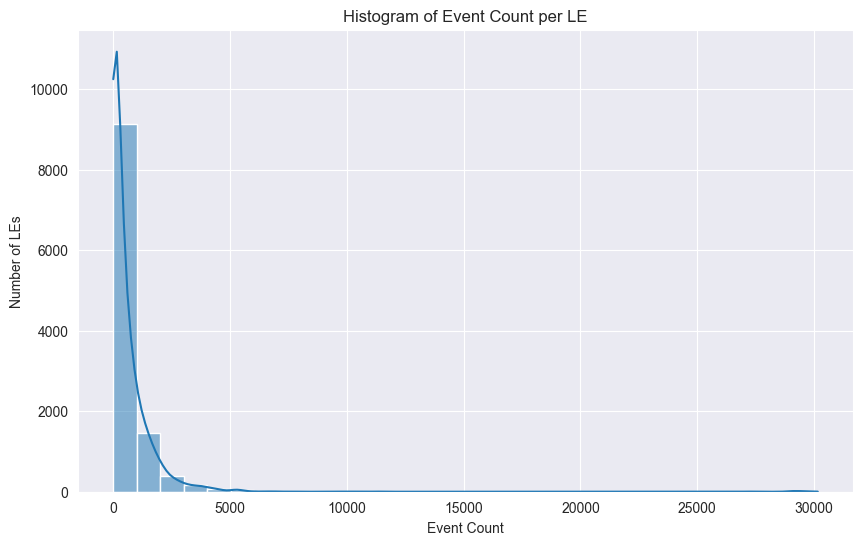

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(le_event_summary['event_count'], bins=30, kde=True)
plt.title('Histogram of Event Count per LE')
plt.xlabel('Event Count')
plt.ylabel('Number of LEs')
plt.grid(True)
plt.show()

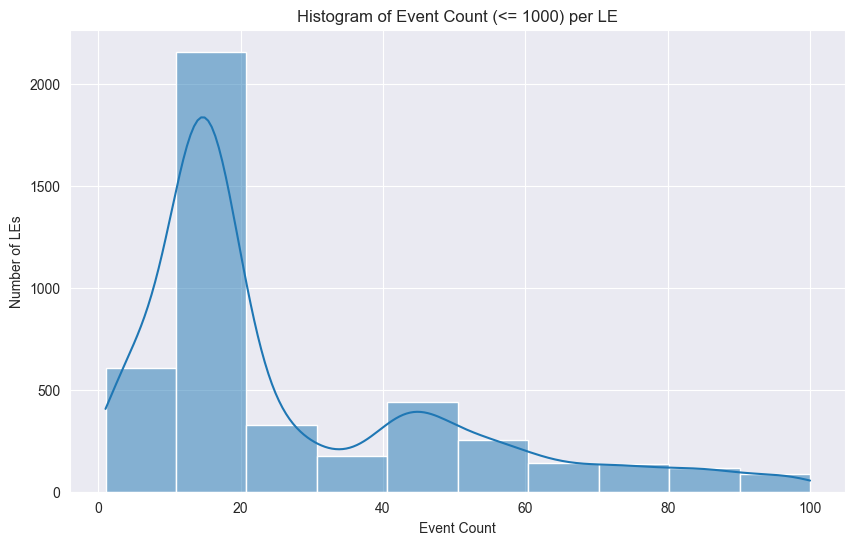

In [31]:
# Filter only rows with event_count <= 1000
filtered_summary = le_event_summary[le_event_summary['event_count'] <= 100]

# Plot the histogram for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_summary['event_count'], bins=10, kde=True)
plt.title('Histogram of Event Count (<= 1000) per LE')
plt.xlabel('Event Count')
plt.ylabel('Number of LEs')
plt.grid(True)
plt.show()

In [18]:
# Count the number of unique event types per LE
le_event_type_counts = combined_le_df.groupby('le')['event'].nunique()

# Count how many LEs have 1, 2, 3, ... unique events
le_event_distribution = le_event_type_counts.value_counts().sort_index()

# Convert to DataFrame for easier viewing
le_event_distribution_df = le_event_distribution.reset_index()
le_event_distribution_df.columns = ['unique_event_count', 'num_le']

print(le_event_distribution_df)

   unique_event_count  num_le
0                   1     470
1                   2    2504
2                   4      71
3                   5      24
4                   6    1263
5                   7    6946


In [35]:
# LE that has only 1 unique event


# Filter for LEs that only have 1 unique event type
le_with_one_event_type = le_event_type_counts[le_event_type_counts == 1].index

# Optionally, filter the original DataFrame to see the rows
combined_single_event_le_df = combined_le_df[combined_le_df['le'].isin(le_with_one_event_type)]

# to find the distinct paths from le that only has one event_count
filtered = dt_path_movement_finished[(dt_path_movement_finished['mfs_id'].isin(le_with_one_event_type))]
distinct_paths = filtered[['mfs_id', 'paths']].drop_duplicates()
distinct_paths = distinct_paths[distinct_paths['paths'] == '1525 -> 1057']

# Get the unique mfs_ids as strings
mfs_ids_to_1772 = distinct_paths['mfs_id'].astype(str).unique()

distinct_path_le_counts = (
    filtered
    .groupby('paths')['mfs_id']
    .nunique()
    .reset_index(name='distinct_le_count')
    .sort_values(by='distinct_le_count', ascending=False)
)

# View the result
# combined_single_event_le_df
# distinct_paths
distinct_path_le_counts
# combined_le_df[combined_le_df['le'] == '1847230']
# combined_alert_df[combined_alert_df['text'].astype(str).str.contains('1847230')]

,paths,distinct_le_count
0,,439
10,1745 -> 1746,434
12,"1762 -> 1745, 1745 -> 1746",393
14,"1772 -> 1745, 1745 -> 1746",55
1,1003 -> 1002,22
11,1746 -> 1772,16
3,"1054 -> 1745, 1745 -> 1746",3
4,1515 -> 1057,3
5,1525 -> 1057,3
6,1535 -> 1057,3


In [39]:
combined_le_df[combined_le_df['le']== '1847236']

,timestamp,le,additional_data,event
4859833,2025-02-06 06:51:41.463,1847236,"paths: 1762 -> 1745, 1745 -> 1746",path_movement_finished
4859944,2025-02-06 06:52:11.719,1847236,paths:,path_movement_finished
4860013,2025-02-06 06:52:35.341,1847236,paths: 1745 -> 1746,path_movement_finished
4860014,2025-02-06 06:52:35.372,1847236,paths: 1745 -> 1746,path_movement_finished
4860038,2025-02-06 06:52:46.265,1847236,paths: 1746 -> 1772,path_movement_finished
4860039,2025-02-06 06:52:46.296,1847236,paths: 1746 -> 1772,path_movement_finished
4860087,2025-02-06 06:52:54.047,1847236,"paths: 1772 -> 1745, 1745 -> 1746",path_movement_finished
4860089,2025-02-06 06:52:54.110,1847236,"paths: 1772 -> 1745, 1745 -> 1746",path_movement_finished
4860144,2025-02-06 06:53:08.830,1847236,paths:,path_movement_finished
4860166,2025-02-06 06:53:14.347,1847236,paths: 1745 -> 1746,path_movement_finished


In [36]:
# last path occurrence for le that goes to 1772

last_occurrence_df = (
    dt_path_movement_finished[
        dt_path_movement_finished['mfs_id'].isin(mfs_ids_to_1772)
    ]
    .sort_values(['mfs_id', 'timestamp'])
    .groupby('mfs_id', as_index=False)
    .last()
)

last_occurrence_df

,mfs_id,timestamp,info_code,thread,operation_num,search_status,status,code,paths
0,1847228,2025-02-06 06:48:12.022,I,MF1,G41995918,finished,true,0,1745 -> 1746
1,1849217,2025-02-07 11:12:27.280,I,MF1,G47749268,finished,true,0,1745 -> 1746
2,1854266,2025-02-11 07:05:52.760,I,MF1,G66906931,finished,true,0,1745 -> 1746


In [14]:
# Path NIO 1002

path_nio = dt_path_movement_finished_detail[dt_path_movement_finished_detail['to'] == '1002' ]
path_nio = path_nio[['timestamp', 'mfs_id', 'from', 'to']]
path_nio['event'] = 'dt_path_movement_finished_detail'

# this is to grab the data from dt_alerts_handled, dt_alerts_received, dt_alerts_processing, dt_telegrams_processed, dt_telegrams_sent (just change the table name)
# Get unique mfs_ids as strings
mfs_ids = path_nio['mfs_id'].astype(str).unique()

'''
# this is to grab the data from dt_execute_rbg, dt_start_handle_request, dt_end_handle_request, dt_is_position_ok, dt_check_sequence, dt_is_vb_ok  (just change the table name)
filtered_df = dt_is_vb_ok[
    dt_is_vb_ok['id'].isin(path_nio['mfs_id'])
]
'''

# Add a column 'mfs_id' by finding which ID is in the 'text' field
def extract_mfs_id(text):
    for mfs_id in mfs_ids:
        if mfs_id in text:
            return mfs_id
    return None

# Filter rows where 'text' contains any mfs_id
filtered_df = dt_alerts_handled[
    dt_alerts_handled['text'].astype(str).apply(
        lambda x: any(mfs_id in x for mfs_id in mfs_ids)
    )
]
filtered_df['mfs_id'] = filtered_df['text'].astype(str).apply(extract_mfs_id)
nio_alert_handled = filtered_df[['timestamp', 'mfs_id', 'alert_name', 'lfdnr', 'text']]
nio_alert_handled['event'] = 'dt_alerts_handled'

filtered_df = dt_alerts_received[
    dt_alerts_received['text'].astype(str).apply(
        lambda x: any(mfs_id in x for mfs_id in mfs_ids)
    )
]
filtered_df['mfs_id'] = filtered_df['text'].astype(str).apply(extract_mfs_id)
nio_alert_received = filtered_df[['timestamp', 'mfs_id', 'alert_name', 'lfdnr', 'text']]
nio_alert_received['event'] = 'dt_alerts_received'

filtered_df = dt_alerts_processing[
    dt_alerts_processing['text'].astype(str).apply(
        lambda x: any(mfs_id in x for mfs_id in mfs_ids)
    )
]
filtered_df['mfs_id'] = filtered_df['text'].astype(str).apply(extract_mfs_id)
nio_alert_processing = filtered_df[['timestamp', 'mfs_id', 'alert_name', 'lfdnr', 'text']]
nio_alert_processing['event'] = 'dt_alerts_processing'

filtered_df = dt_telegrams_processed[
    dt_telegrams_processed['text'].astype(str).apply(
        lambda x: any(mfs_id in x for mfs_id in mfs_ids)
    )
]
filtered_df['mfs_id'] = filtered_df['text'].astype(str).apply(extract_mfs_id)
nio_telegrams_processed = filtered_df[['timestamp', 'mfs_id', 'alert_name', 'text']]
nio_telegrams_processed['event'] = 'dt_telegrams_processed'

filtered_df = dt_telegrams_sent[
    dt_telegrams_sent['text'].astype(str).apply(
        lambda x: any(mfs_id in x for mfs_id in mfs_ids)
    )
]
filtered_df['mfs_id'] = filtered_df['text'].astype(str).apply(extract_mfs_id)
nio_telegrams_sent = filtered_df[['timestamp', 'mfs_id', 'alert_name', 'text']]
nio_telegrams_sent['event'] = 'dt_telegrams_sent'

nio_combined = pd.concat([
    path_nio,
    nio_alert_handled,
    nio_alert_received,
    nio_alert_processing,
    nio_telegrams_processed,
    nio_telegrams_sent
], ignore_index=True)
nio_combined = nio_combined.sort_values(by='timestamp')
nio_combined

# empty: dt_execute_rbg, dt_start_handle_request, dt_end_handle_request, dt_is_position_ok, dt_check_sequence, dt_is_vb_ok
# dt_alerts_handled, dt_alerts_received: always 3 values -> once MFS_START_1003, twice MF1_FROMTSS
# dt_alerts_processing, dt_telegrams_processed: 2 values -> text with '...\FA\...' and '...'\AB\...'
# dt_telegrams_sent: 5 values -> 3 different alert_name: TSS_FROMMF1, LHM_AUFGESETZT_1003, TSS_FROMMF1, LHM_ANGEKOMMEN_1002, LHM_ANGEKOMMEN_1002


/var/folders/8y/1cdt55ss0n78n2j9ttm9pnj80000gn/T/ipykernel_1284/3439667175.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mfs_id'] = filtered_df['text'].astype(str).apply(extract_mfs_id)
/var/folders/8y/1cdt55ss0n78n2j9ttm9pnj80000gn/T/ipykernel_1284/3439667175.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nio_alert_handled['event'] = 'dt_alerts_handled'
/var/folders/8y/1cdt55ss0n78n2j9ttm9pnj80000gn/T/ipykernel_1284/3439667175.py:40: SettingWithCopyWarning: 
A value is trying to b

,timestamp,mfs_id,from,to,event,alert_name,lfdnr,text
242,2025-02-06 12:34:23.396,1847820,NaN,NaN,dt_telegrams_sent,TSS_FROMMF1,NaN,1003\0\DO\0\1003\1003\1003\0\2048\0\0\0\0\0\0\...
243,2025-02-06 12:34:23.396,1847820,NaN,NaN,dt_telegrams_sent,LHM_AUFGESETZT_1003,NaN,\MFS_ID1=1847820\HOST_LHM_ID1=10030393\PLATZ=1...
88,2025-02-06 12:34:23.489,1847820,NaN,NaN,dt_alerts_received,MFS_START_1003,None,PLATZ=1003\ZIEL=1002\MFS_ID1=1847820\HOST_LHM_...
22,2025-02-06 12:34:23.489,1847820,NaN,NaN,dt_alerts_handled,MFS_START_1003,None,PLATZ=1003\ZIEL=1002\MFS_ID1=1847820\HOST_LHM_...
0,2025-02-06 12:34:23.536,1847820,1003,1002,dt_path_movement_finished_detail,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
197,2025-02-13 14:46:18.963,1857985,NaN,NaN,dt_alerts_processing,MF1_FROMTSS,78229917,1002\22192\AB\0\1002\1003\1002\0\1024\2\1002\1...
153,2025-02-13 14:46:18.963,1857985,NaN,NaN,dt_alerts_received,MF1_FROMTSS,None,1002\22192\AB\0\1002\1003\1002\0\1024\2\1002\1...
87,2025-02-13 14:46:18.978,1857985,NaN,NaN,dt_alerts_handled,MF1_FROMTSS,None,1002\22192\AB\0\1002\1003\1002\0\1024\2\1002\1...
241,2025-02-13 14:46:18.978,1857985,NaN,NaN,dt_telegrams_processed,MF1_FROMTSS,NaN,1002\22192\AB\0\1002\1003\1002\0\1024\2\1002\1...


In [52]:
# Failed path
merged_from = pd.merge(
    dt_path_movement_failed,
    dt_akl_layout,
    left_on='path_from',
    right_on='Point',
    how='left',
    suffixes=('', '_from')
)

# Then, join the result on 'to'
merged_full = pd.merge(
    merged_from,
    dt_akl_layout,
    left_on='path_to',
    right_on='Point',
    how='left',
    suffixes=('', '_to')
)

failed_path = merged_full[['timestamp', 'operation_num', 'mfs_id', 'path_from', 'Field', 'Direction', 'Position/Zone', 'path_to', 'Field_to', 'Direction_to', 'Position/Zone_to']]

failed_path

,timestamp,operation_num,mfs_id,path_from,Field,Direction,Position/Zone,path_to,Field_to,Direction_to,Position/Zone_to
0,2025.02.06 05:59:31.926,G41856853,1847011,1631,CONVEYER BELT,OUT,CONVEYER BELT,1726,KOMM 2,OUT,CONVEYER BELT
1,2025.02.06 05:59:38.865,G41857187,1847011,1720,KOMM 2,OUT,CONVEYER BELT,1726,KOMM 2,OUT,CONVEYER BELT
2,2025.02.06 05:59:40.131,G41857252,1847007,1631,CONVEYER BELT,OUT,CONVEYER BELT,1726,KOMM 2,OUT,CONVEYER BELT
3,2025.02.06 05:59:46.920,G41857586,1847006,1631,CONVEYER BELT,OUT,CONVEYER BELT,1726,KOMM 2,OUT,CONVEYER BELT
4,2025.02.06 05:59:52.988,G41857890,1847002,1631,CONVEYER BELT,OUT,CONVEYER BELT,1726,KOMM 2,OUT,CONVEYER BELT
...,...,...,...,...,...,...,...,...,...,...,...
26797,2025.02.13 19:11:30.894,G79459053,1858275,1730,KOMM 3,OUT,CONVEYER BELT,1736,KOMM 3,OUT,CONVEYER BELT
26798,2025.02.13 19:12:54.529,G79463719,1858274,1400,GASSE 4,IN,GASSE 4,104007,NaN,NaN,NaN
26799,2025.02.13 19:13:42.273,G79466965,1858278,1300,GASSE 3,IN,GASSE 3,103005,NaN,NaN,NaN
26800,2025.02.13 19:13:46.523,G79467289,1858277,1200,GASSE 2,IN,GASSE 2,102003,NaN,NaN,NaN


In [24]:
# ulist = dt_unknown['stage'].unique()
# ulist.sort()
# print(ulist)

dt_unknown[dt_unknown['stage'] == 'handleRequest']

,timestamp,info_code,thread,operation_num,stage,data
87118,2025.02.06 09:59:06.849,E,MF3,G42501674,handleRequest,Fehler: null
231162,2025.02.07 07:40:56.475,E,MF3,G47163796,handleRequest,Fehler: null
231163,2025.02.07 07:40:56.881,E,MF3,G47163811,handleRequest,Fehler: null
231165,2025.02.07 07:40:57.288,E,MF3,G47163825,handleRequest,Fehler: null
231166,2025.02.07 07:40:57.694,E,MF3,G47163840,handleRequest,Fehler: null
...,...,...,...,...,...,...
1276215,2025.02.12 09:52:22.534,E,MF3,G72731316,handleRequest,Fehler: null
1276217,2025.02.12 09:52:22.737,E,MF3,G72731332,handleRequest,Fehler: null
1276219,2025.02.12 09:52:22.940,E,MF3,G72731349,handleRequest,Fehler: null
1276221,2025.02.12 09:52:23.363,E,MF3,G72731382,handleRequest,Fehler: null
